<a href="https://colab.research.google.com/github/jv-mendes07/precos_imoveis_ML/blob/main/Pre%C3%A7o_de_Im%C3%B3veis_Modelo_de_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preço de Imóveis em Bangalore, Índia - Modelo de Regressão

In [1]:
# Importação de bibliotecas:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Importação do conjunto de dados que será usado para a construção do modelo de machine learning:

df = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')

In [3]:
# Visualização das cinco primeiras linhas do dataframe:

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Quantidade de linhas e colunas atribuídas a variáveis distintas:

l, c = df.shape

In [5]:
# Impressão da quantidade de linhas e colunas contidas no dataframe:

print('Quantidade de Linhas: ', l)
print('\n')
print('Quantidade de Colunas: ', c)

Quantidade de Linhas:  13320


Quantidade de Colunas:  9


## Tratamento de dados:

In [6]:
# Colunas presentes no dataset:

df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
# Exclusão de determinadas colunas que não serão úteis para o treinamento do modelo preditivo:

df_2 = df.drop(['area_type', 'availability', 'society', 'balcony'],
        axis = 'columns')

In [8]:
# Visualização do novo dataframe, após a exclusão de determinadas colunas:

df_2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
# Quantidade de dados nulos por coluna:

df_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# Exclusão dos dados nulos, com o objetivo de simplificar a análise e a construção do modelo:

df_3 = df_2.dropna()

In [11]:
# Verificação de que os dados nulos foi excluída:

df_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
# Quantidade de linhas e colunas, após a exclusão de colunas e linhas com dados nulos:

df_3.shape

(13246, 5)

In [13]:
# Valores únicos presentes na coluna 'size' que representa a quantidade de quartos:

df_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# Conversão da coluna 'size' de tipo textual (object) para tipo numérico (int):

df_3['bhk'] = df_3['size'].apply(lambda x : int(x.split(' ')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
# Valores únicos de quantidade de quartos dos imóveis de Bangalore, Índia:

df_3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
# Verificação de que o tipo de dado foi corretamente convertido:

df_3['bhk'].dtype

dtype('int64')

In [17]:
# Verificação de imóveis que contêm mais de 20 quartos:

df_3.query('bhk > 20')

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
# Valores únicos de área dos quartos em pés quadrados:

df_3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# Função para convertes os valores da coluna 'total_sqft' de tipo texto (object) para tipo numérico com casa decimal (float):

def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [20]:
# Filtro de todos os valores da coluna 'total_sqft' que não são conversíveis para tipo float,
# por conterem caracteres não-numéricos:

df_3[~df_3.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
# Função para retirar a média de área em pés quadrados de valores que apresentam um intervalo numérico e aproximado,
# além de tal função converter tais elementos da coluna 'total_sqft' para o tipo float:

def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1])) / 2
  try:
    return float(x)
  except:
    return None

In [22]:
# Teste da função criada para converter texto em float:

convert_sqft_to_num('2166')

2166.0

In [23]:
# Teste da função para retirar a média de elemento que apresenta um valor estimado e aproximado da área em pés quadrados dentro de um intervalo:

convert_sqft_to_num('2100 - 2850')

2475.0

In [24]:
# Mais um teste para verificar que a função executará todos os códigos programados à serem executados:

convert_sqft_to_num('34.46Sq.Meter')

In [25]:
# Atribuição da cópia do dataframe para outra variável:

df_4 = df_3.copy()

In [26]:
# Aplicação da função para converter todos os valores da coluna 'total_sqft' de texto para tipo flutuante (float):

df_4['total_sqft'] = df_4['total_sqft'].apply(convert_sqft_to_num)

In [27]:
# Verificação após tal modificação no tipo de dados de tal coluna:

df_4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
# Nova atribuição de cópia do dataset à uma nova variável:

df_5 = df_4.copy()

In [29]:
# Criação da coluna de preço por pés quadrados para verificarmos posteriormente outliers (valores atípicos) e eliminarmos:

df_5 = df_5.assign(price_per_sqft = df_5['price'] * 100000 / df_5['total_sqft'])

In [30]:
# Verificação do dataset após criação de tal coluna:

df_5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
# Quantidade de valores únicos de localizações que contêm imóveis registrados em Bangalore, Índia:

len(df_5.location.unique())

1304

In [32]:
# Retirada de qualquer espaço em branco que esteja presente na coluna 'location':

df_5.location = df_5.location.apply(lambda x : x.strip())

In [33]:
# Agrupamento da quantidade de imóveis por localização presentes em Bangalore:

location_stats = df_5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [34]:
# Visualização das 20 localizações com suas respectivas quantidades de imóveis presentes:

location_stats[:20]

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Name: location, dtype: int64

In [35]:
# Quantidade de localizações que contêm menos de 10 imóveis:

len(location_stats[location_stats <= 10])

1052

In [36]:
# Atribuição de tais localizações com menos de 10 imóveis à uma nova variável:

location_stats_less_than_10 = location_stats[location_stats <= 10]

In [37]:
# Verificação de tais localizações que contêm mais ou 10 imóveis presentes:

location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [39]:
# Teste de lógica que iremos usar para atribuir todas às localizações com menos de 10 imóveis à uma mesma classe de localizações:

'Kanakapura main  Road' in location_stats_less_than_10

True

In [40]:
# Aplicação de função para substituir os nomes das localizações com menos de 10 imóveis à uma mesma classe, denominada 'outros':

df_5.location = df_5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [41]:
# Quantidade de valores únicos de localizações que contêm imóveis em Bangalore reduzida após a aplicação da função acima:

len(df_5.location.unique())

242

In [42]:
# Identificação de imóveis que contêm quartos com menos de 300 pés quadrados:

df_5[df_5.total_sqft / df_5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [43]:
# Verificação da quantidade de linhas e colunas que estão presentes até o momento no dataset:

df_5.shape

(13246, 7)

In [44]:
# Atribuição do dataset à uma nova variável, que irá conter somente imóveis que 300 ou mais pés quadrados por quarto:

df_6 = df_5[~(df_5.total_sqft / df_5.bhk < 300)]
df_6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [45]:
# Descrições estatísticas básicas e resumidas sobre a coluna de preço por pé quadrado:

df_6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
# Função para excluir imóveis que contenham preços por pés quadrados considerados outliers (valores extremos):

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
        
df_7 = remove_pps_outliers(df_6)
df_7.shape

(10241, 7)

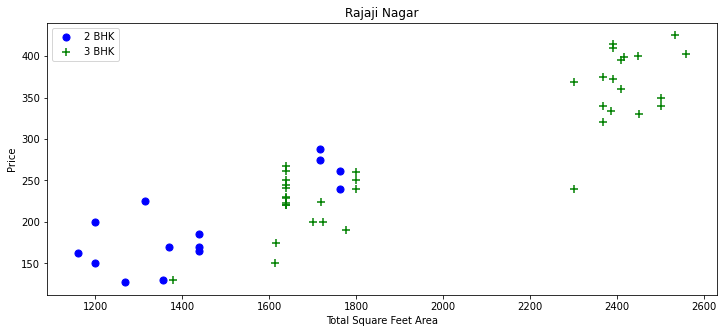

In [47]:
# Função para plotar um gráfico de dispersão que expresse visualmente o preço de cada imóvel pela área total em pés quadrados, para imóveis
# com 2 e 3 quartos:

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (12, 5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK',
               s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', label = '3 BHK',
               s = 50, marker = '+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_7, 'Rajaji Nagar')

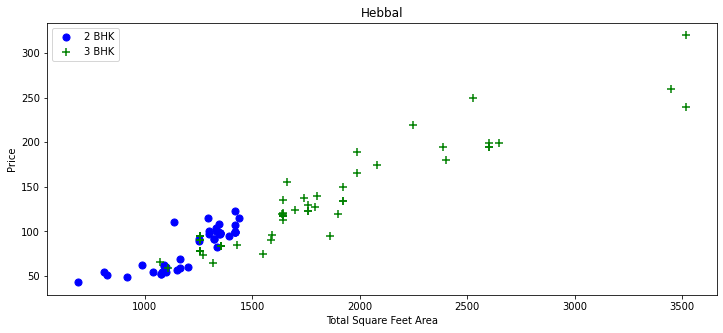

In [48]:
# Aplicação de tal função gráfica para termos a visualização de preço de imóveis por área total para imóveis de 2 e 3 quartos na localização de 
# Hebbal em Bangalore:

plot_scatter_chart(df_7, 'Hebbal')

In [49]:
# Função para excluir imóveis que tenham mais quartos e sejam mais baratos do que imóveis com menos quartos e mais caros:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df_8 = remove_bhk_outliers(df_7)
df_8.shape

(7329, 7)

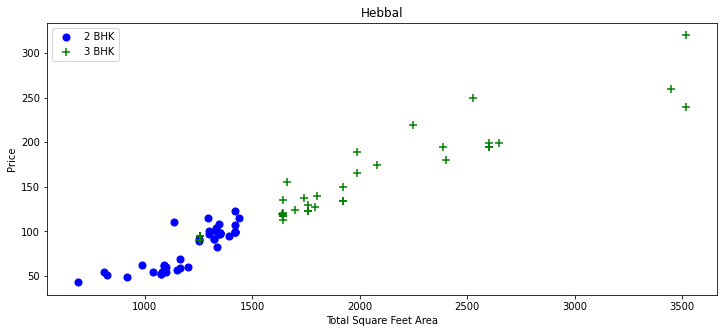

In [50]:
# Visualização de preço de imóveis por área total para imóveis de 2 e 3 quartos na localização de Hebbal em Bangalore, após
# eliminarmos outliers do conjunto de dados:

plot_scatter_chart(df_8, 'Hebbal')

Text(0, 0.5, 'Count')

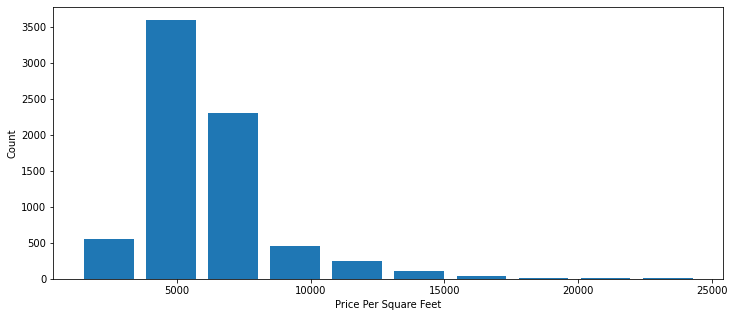

In [51]:
# Histograma para visualizarmos a frequência quantitativa de imóveis com base em preços por pés quadrados:

matplotlib.rcParams['figure.figsize'] = (12, 5)
plt.hist(df_8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [52]:
# Valores únicos da quantidade de banheiros dos imóveis de Bangalore:

df_8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
# Filtragem de imóveis com mais de 10 banheiros:

df_8[df_8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


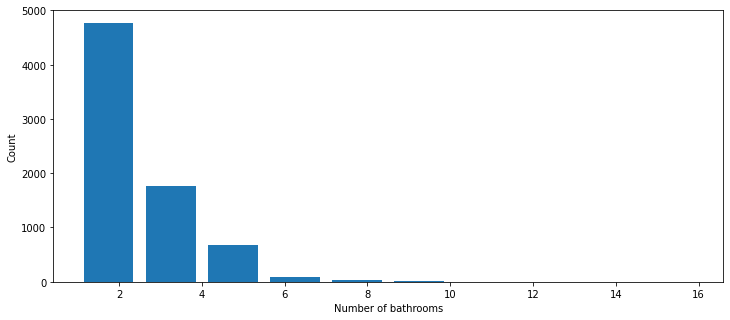

In [54]:
# Histograma de frequência quantitativa de imóveis pela quantidade de banheiros:
plt.hist(df_8.bath, rwidth = 0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [55]:
# Exclusão de imóveis que contenham mais banheiros do que quartos presentes: 

df_9 = df_8[df_8.bath < df_8.bhk + 2]

In [56]:
# Quantidade de linhas e colunas após realizarmos tal exclusão de outliers:

df_9.shape

(7251, 7)

In [57]:
# Exclusão da coluna 'size' e preço por pés quadrados, por não serem mais colunas que serão úteis para análise
# e principalmente para construção conseguinte do modelo de aprendizagem maquínica:

df_10 = df_9.drop(['size', 'price_per_sqft'], axis = 'columns')

In [58]:
# Verificação do dataset após exclusão de tais colunas:

df_10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [59]:
# Criação de variáveis dummies para converter a coluna de localização de tipo categórico para tipo numérico
# , e assim podermos aplicar o modelo de machine learning:

dummies = pd.get_dummies(df_10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Concatenação do dataset com às novas colunas criadas após a transformação da variável 'location' em uma variável dummy:

df_11 = pd.concat([df_10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df_11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Exclusão da coluna 'location' após termos convertido todos as localizações de tal coluna em variáveis numéricas:

df_12 = df_11.drop('location', axis = 'columns')
df_12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Quantidade de linhas e colunas após termos concluído tal limpeza de dados:

df_12.shape

(7251, 245)

## Criação do modelo de machine Learning:

In [63]:
# Variável X que conterá todas às variáveis independentes que serão usadas para prever o preço dos imóveis,
# e exclusão da variável 'price' que estará inclusa somente na variável Y:

X = df_12.drop('price', axis = 'columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Atribuição da variável 'price' para a variável y:

y = df_12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [65]:
# Importação da função train_test_split para separarmos o conjunto de dados em dados de treino e dados de teste:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [66]:
# Importação do modelo de regressão linear, junto com a aplicação do método fit para treinarmos os dados de treino 
# , e por fim aplicação do método score para termos o retorno da acurácia preditiva do modelo treinado:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874383

In [67]:
# Técnica de validação cruzada para vermos a eficiência preditiva contínua de tal modelo 
# após determinadas iterações:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [68]:
# Média de acurácia preditiva da validação cruzada aplicada com modelo de regressão linear ao conjunto de dados de treino:

np.mean(cross_val_score(LinearRegression(), X, y, cv = cv))

0.8183540750695852

In [69]:
# Função  de ajustamento de parâmetros para sabermos quais são os modelos mais acurados
# e quais são os melhores parâmetros para podermos prever os preços dos imóveis de Bangalore:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [70]:
# Aplicação de tal função criada para sabermos qual é o melhor modelo e quais são os melhores parâmetros
# para prevermos os preços dos imóveis:

find_best_model_using_gridsearchcv(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687434,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.724512,"{'criterion': 'mse', 'splitter': 'best'}"


In [71]:
# Colunas da variável X:

X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [72]:
# Função criada para prever o preço do imóvel com base na localização, na área total por pés quadrados, e com base na quantidade de banheiros e 
# de quartos de cada imóvel:

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [73]:
# Previsão de preço para um imóvel com dois quartos e banheiros, com 1000 pés quadrados e localizado em 1st Phase JP Nagar:

predict_price('1st Phase JP Nagar', 1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


83.49904677207954

In [74]:
# Previsão de preço para um imóvel com três quartos e banheiros, com 1000 pés quadrados e localizado em 1st Phase JP Nagar:

predict_price('1st Phase JP Nagar', 1000, 3, 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.80519395234735

In [75]:
#  Previsão de preço para um imóvel com três quartos e banheiros, com 1000 pés quadrados e localizado em Indira Nagar:

predict_price('Indira Nagar', 1000, 3, 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


184.58430202033142

In [76]:
#  Previsão de preço para um imóvel com dois quartos e banheiros, com 1000 pés quadrados e localizado em Indira Nagar:

predict_price('Indira Nagar', 1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


181.2781548400636

In [77]:
# Importação de tal modelo criado e treinado para podermos usa-lo posteriormente:

import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [78]:
# Importação de colunas do dataset para um arquivo .json:

import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

## FIM